In [1]:
import requests
import pandas as pd
import psycopg2
import streamlit as st

backend = 'http://backend-physio.herokuapp.com/'

# data = requests.get(backend+ 'get_session_history/Kris_Dukov').json()

con = psycopg2.connect(database="de4cn1offapl8v", user="ulsgeknkidrahz", password="bc2b79411071b262a88175effdda21f6e8ebfa42707028117c986cc94c06b638", host="ec2-54-74-156-137.eu-west-1.compute.amazonaws.com", port="5432")
# df = pd.read_sql('select *, ROW_NUMBER( ) OVER ( PARTITION BY DATE(timestamp_session), exercise, patient  ORDER BY timestamp_session ) as set_number from \"session\"', con=con)
df = pd.read_sql('select DATE(timestamp_session) as date, exercise, patient, duration, target, completed, min_angle, max_angle, ROW_NUMBER( ) OVER ( PARTITION BY DATE(timestamp_session), exercise, patient  ORDER BY timestamp_session ) as set_number  from \"session\"', con=con)

# df = pd.read_sql('select * from \"pain\"', con=con)

# df = pd.read_sql('select DATE(timestamp_pain) as date, patient, before_pain, after_pain from \"pain\"', con=con);
# df = df.groupby(by = ['date','patient']).agg(target = ('target','sum'), completed = ('completed','sum')).reset_index().sort_values(by = 'date')
df['%'] = df['completed']/df['target']
df = df[df['patient']=='Tsvetomir Dimitrov']
df

# df = pd.read_sql()
# # df = pd.DataFrame(data)

# st.write("# TESTING dataframes")
# st.write(df)

,date,exercise,patient,duration,target,completed,min_angle,max_angle,set_number,%
22,2022-10-24,Exercise A,Tsvetomir Dimitrov,38,10,7,0,30,1,0.7
23,2022-10-24,Exercise A,Tsvetomir Dimitrov,56,10,5,0,27,2,0.5
24,2022-10-24,Exercise A,Tsvetomir Dimitrov,77,10,3,0,27,3,0.3
25,2022-10-24,Exercise B,Tsvetomir Dimitrov,50,10,7,0,27,1,0.7
26,2022-10-24,Exercise B,Tsvetomir Dimitrov,60,10,6,0,27,2,0.6
...,...,...,...,...,...,...,...,...,...,...
80,2022-10-30,Exercise B,Tsvetomir Dimitrov,37,10,10,0,44,2,1.0
81,2022-10-30,Exercise B,Tsvetomir Dimitrov,39,10,9,0,43,3,0.9
82,2022-10-30,Exercise C,Tsvetomir Dimitrov,22,10,10,0,44,1,1.0
83,2022-10-30,Exercise C,Tsvetomir Dimitrov,23,10,10,0,42,2,1.0


Melt

In [2]:
df2 = pd.melt(df, id_vars=['date', 'exercise', 'patient', 'duration', 'min_angle', 'max_angle', 'set_number', '%'], value_vars=['target', 'completed'], var_name= 'set completion', value_name='reps')
df2

,date,exercise,patient,duration,min_angle,max_angle,set_number,%,set completion,reps
0,2022-10-24,Exercise A,Tsvetomir Dimitrov,38,0,30,1,0.7,target,10
1,2022-10-24,Exercise A,Tsvetomir Dimitrov,56,0,27,2,0.5,target,10
2,2022-10-24,Exercise A,Tsvetomir Dimitrov,77,0,27,3,0.3,target,10
3,2022-10-24,Exercise B,Tsvetomir Dimitrov,50,0,27,1,0.7,target,10
4,2022-10-24,Exercise B,Tsvetomir Dimitrov,60,0,27,2,0.6,target,10
...,...,...,...,...,...,...,...,...,...,...
121,2022-10-30,Exercise B,Tsvetomir Dimitrov,37,0,44,2,1.0,completed,10
122,2022-10-30,Exercise B,Tsvetomir Dimitrov,39,0,43,3,0.9,completed,9
123,2022-10-30,Exercise C,Tsvetomir Dimitrov,22,0,44,1,1.0,completed,10
124,2022-10-30,Exercise C,Tsvetomir Dimitrov,23,0,42,2,1.0,completed,10


Try mathplotlib

Overview

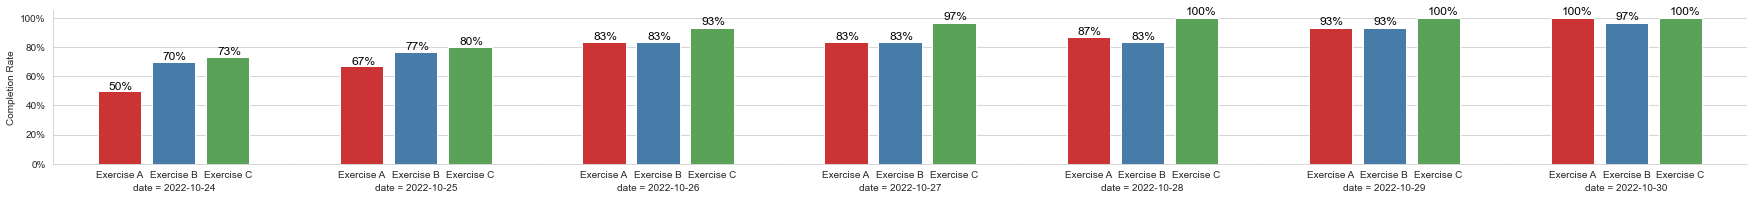

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_style('whitegrid')
# g = sns.catplot(x="exercise", y= 'reps', hue="set completion", col="date",
g = sns.catplot(x="exercise", y= '%', col="date",
                data=df,
                kind="bar",height=3, aspect=1.2, palette='Set1',errorbar=None)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_ylabel('Completion Rate')
    ax.set_xlabel(ax.get_title())
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    ax.set_title('')
    ax.margins(x=0.3) # slightly more margin as a separation
    # for i in ax.containers:
    #     ax.bar_label(i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.2, 
                p.get_height() * 1.02, 
                '{:.0%}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

plt.show()

Detailed tab 2

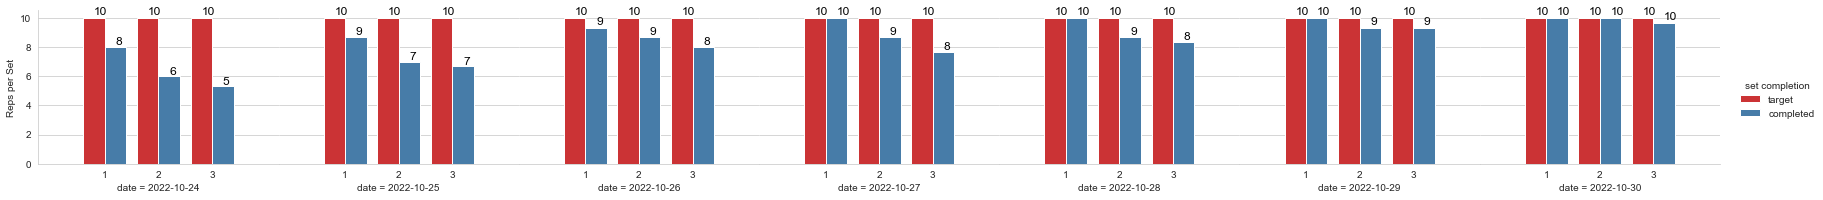

In [27]:
g = sns.catplot(x="set_number", y= 'reps', col="date", hue = 'set completion',
                data=df2,
                kind="bar",height=3, aspect=1.2, palette='Set1',errorbar=None)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_ylabel('Reps per Set')
    ax.set_xlabel(ax.get_title())
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}'.format(y))) 
    ax.set_title('')
    ax.margins(x=0.3) # slightly more margin as a separation
    # for i in ax.containers:
    #     ax.bar_label(i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.2, 
                p.get_height() * 1.02, 
                '{:.0f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

plt.show()

Duration

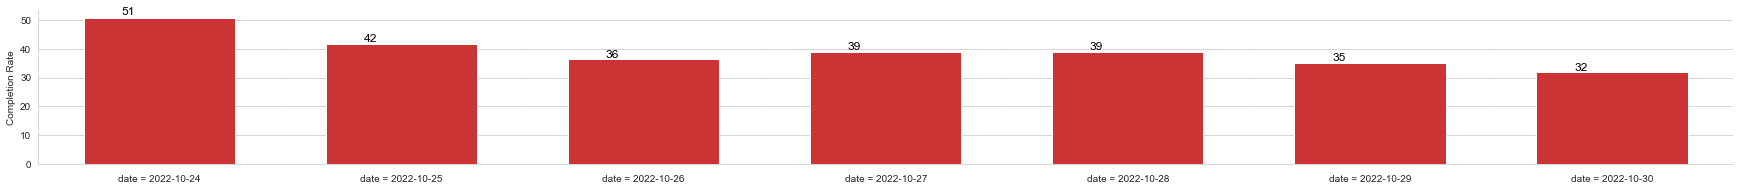

In [17]:
sns.set_style('whitegrid')
# g = sns.catplot(x="exercise", y= 'reps', hue="set completion", col="date",
duration = sns.catplot(y= 'duration', col="date",
                data=df,
                kind="bar",height=3, aspect=1.2, palette='Set1',errorbar=None)
for ax in duration.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in duration.axes.flat:
    ax.set_ylabel('Completion Rate')
    ax.set_xlabel(ax.get_title())
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{0:.0f}'.format(y))) 
    ax.set_title('')
    ax.margins(x=0.3) # slightly more margin as a separation
    # for i in ax.containers:
    #     ax.bar_label(i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.2, 
                p.get_height() * 1.02, 
                '{0:.0f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

plt.show()

Pain

In [19]:
df = pd.read_sql('select DATE(timestamp_pain) as date, patient, before_pain, after_pain from \"pain\"', con=con);
# df = df.groupby(by = ['date','patient']).agg(target = ('target','sum'), completed = ('completed','sum')).reset_index().sort_values(by = 'date')
df_pain = pd.melt(df, id_vars=['date','patient'], var_name= 'pain_type', value_name='value')

df_pain

,date,patient,pain_type,value
0,2022-01-15,Kris_Dukov,before_pain,6
1,2022-01-15,Kris_Dukov1221,before_pain,6
2,2022-05-20,elena_nedkova,before_pain,7
3,2022-05-20,elena_nedkova,before_pain,2
4,2022-05-20,elena_nedkova,before_pain,4
...,...,...,...,...
815,2022-10-26,Tsvetomir Dimitrov,after_pain,7
816,2022-10-27,Tsvetomir Dimitrov,after_pain,6
817,2022-10-28,Tsvetomir Dimitrov,after_pain,5
818,2022-10-29,Tsvetomir Dimitrov,after_pain,4


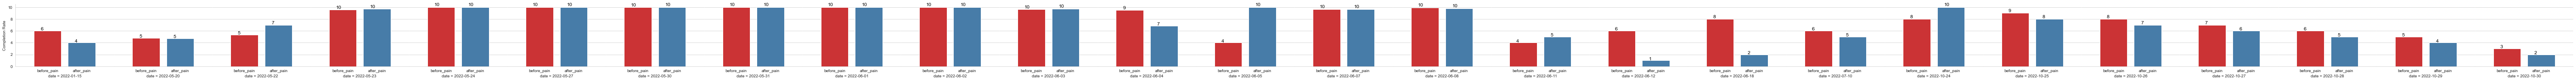

In [22]:
sns.set_style('whitegrid')
# g = sns.catplot(x="exercise", y= 'reps', hue="set completion", col="date",
pain = sns.catplot(y= 'value', col="date", x="pain_type",
                data=df_pain,
                kind="bar",height=3, aspect=1.2, palette='Set1',errorbar=None)
for ax in pain.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in pain.axes.flat:
    ax.set_ylabel('Completion Rate')
    ax.set_xlabel(ax.get_title())
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{0:.0f}'.format(y))) 
    ax.set_title('')
    ax.margins(x=0.3) # slightly more margin as a separation
    # for i in ax.containers:
    #     ax.bar_label(i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.2, 
                p.get_height() * 1.02, 
                '{0:.0f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

plt.show()

try our data

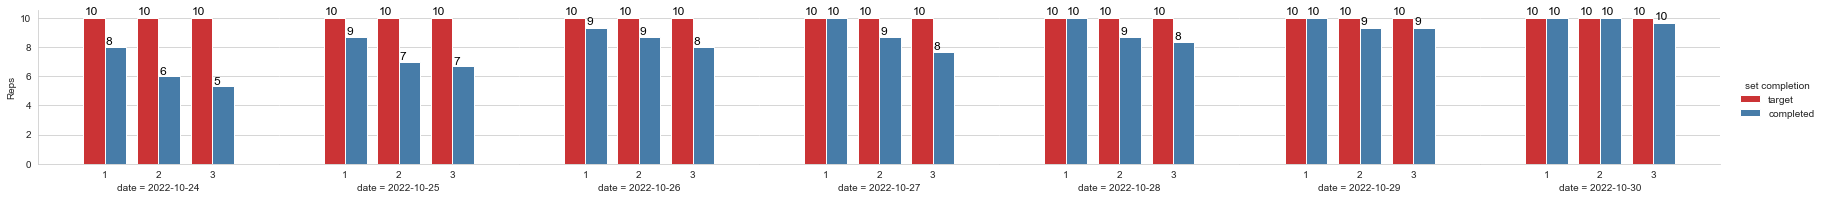

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_style('whitegrid')
g = sns.catplot(x="set_number", y= 'reps', hue="set completion", col="date",
# g = sns.catplot(x="exercise", y= '%', col="date",
                data=df2,
                kind="bar",height=3, aspect=1.2, palette='Set1',errorbar=None)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_ylabel('Reps')
    ax.set_xlabel(ax.get_title())
    # ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    ax.set_title('')
    ax.margins(x=0.3) # slightly more margin as a separation
    # for i in ax.containers:
    #     ax.bar_label(i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.02, 
                p.get_height() * 1.02,
                '{:.0f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

plt.show()